In [33]:
from nltools.mask import create_sphere
import pandas as pd
import os

t1_image = 'MNI152_T1_2mm_brain_mask.nii'
brain_env_mni = pd.read_csv('brain_env_mni.csv')
out_dir = 'brain_envelope_mask/'

if not os.path.exists(out_dir):
    os.makedirs(out_dir)

for row in range(brain_env_mni.shape[0]):
    roi_name = brain_env_mni.iloc[row, 0]
    mni_coordinates = list(brain_env_mni.iloc[row, 1:])
    
    mask=create_sphere(mni_coordinates, radius = 6, mask = t1_image)
    mask.to_filename(out_dir + roi_name + '_6mm.nii.gz')
    
    mask=create_sphere(mni_coordinates, radius = 10, mask = t1_image)
    mask.to_filename(out_dir + roi_name + '_10mm.nii.gz')
    
    mask=create_sphere(mni_coordinates, radius = 14, mask = t1_image)
    mask.to_filename(out_dir + roi_name + '_14mm.nii.gz')


/Users/jingjiang/miniconda3/lib/python3.8/site-packages/nilearn/image/resampling.py:273: UserWarning: Resampling binary images with continuous or linear interpolation. This might lead to unexpected results. You might consider using nearest interpolation instead.
  warnings.warn("Resampling binary images with continuous or "
/Users/jingjiang/miniconda3/lib/python3.8/site-packages/nilearn/image/resampling.py:273: UserWarning: Resampling binary images with continuous or linear interpolation. This might lead to unexpected results. You might consider using nearest interpolation instead.
  warnings.warn("Resampling binary images with continuous or "
/Users/jingjiang/miniconda3/lib/python3.8/site-packages/nilearn/image/resampling.py:273: UserWarning: Resampling binary images with continuous or linear interpolation. This might lead to unexpected results. You might consider using nearest interpolation instead.
  warnings.warn("Resampling binary images with continuous or "
/Users/jingjiang/minic

/Users/jingjiang/miniconda3/lib/python3.8/site-packages/nilearn/image/resampling.py:273: UserWarning: Resampling binary images with continuous or linear interpolation. This might lead to unexpected results. You might consider using nearest interpolation instead.
  warnings.warn("Resampling binary images with continuous or "
/Users/jingjiang/miniconda3/lib/python3.8/site-packages/nilearn/image/resampling.py:273: UserWarning: Resampling binary images with continuous or linear interpolation. This might lead to unexpected results. You might consider using nearest interpolation instead.
  warnings.warn("Resampling binary images with continuous or "
/Users/jingjiang/miniconda3/lib/python3.8/site-packages/nilearn/image/resampling.py:273: UserWarning: Resampling binary images with continuous or linear interpolation. This might lead to unexpected results. You might consider using nearest interpolation instead.
  warnings.warn("Resampling binary images with continuous or "
/Users/jingjiang/minic

In [68]:
from nltools.data import Brain_Data
# import glob

for row in range(brain_env_mni.shape[0]):
    roi_name = brain_env_mni.iloc[row, 0]
    sub1 = Brain_Data(out_dir + roi_name + '_14mm.nii.gz')
    sub2 = Brain_Data(out_dir + roi_name + '_10mm.nii.gz')
    sub3 = Brain_Data(out_dir + roi_name + '_6mm.nii.gz')

#     data = sub2 - sub1

In [79]:
sub1.data = sub1.data - sub2.data
sub1.max()

AttributeError: 'Brain_Data' object has no attribute 'max'

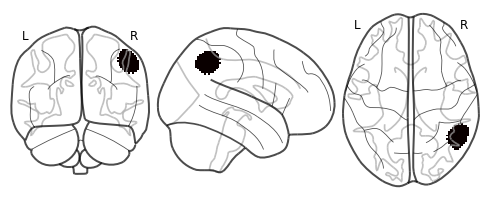

In [78]:
from nilearn.plotting import plot_glass_brain
plot_glass_brain(sub1.to_nifti())

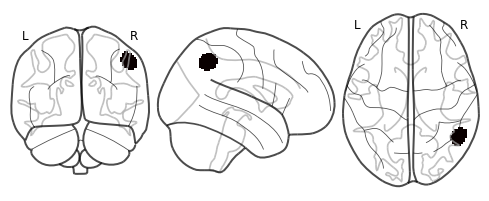

In [76]:
plot_glass_brain(sub2.to_nifti())

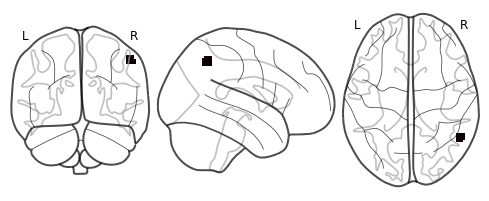

In [53]:
plot_glass_brain(sub3.to_nifti())